In [29]:
import pandas as pd
import numpy as np
import zipfile
import random
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

#from fonction_import_data import afficher_fichier_zip, import_data, readme

In [3]:
PROJECT_PATH = r"C:/Users/fabri/Desktop/ProjectInterPromo/"

In [27]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [17]:
data_v0 = pd.read_csv(PROJECT_PATH + "data/Données_v0/Donnees_V0_NAN_supprimes.csv")
quali_col = []
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

print(len(data_v0.dtypes))
data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])
data_quanti = data_quanti.sample(10000)

257


In [18]:
np.unique(data_quanti["TOP_FRAUDE"], return_counts=True)

(array([0, 1], dtype=int64), array([9977,   23], dtype=int64))

In [23]:
from sklearn.svm import OneClassSVM
X = data_quanti.drop(columns=["TOP_FRAUDE","TOP_FRAUDE_CARTE","TOP_FRAUDE_VIREMENT"])
clf = OneClassSVM(gamma='auto').fit(X)
predic_svm=clf.predict(X)
score =clf.score_samples(X)

In [24]:
np.unique(predic_svm, return_counts=True)

(array([-1,  1], dtype=int64), array([9986,   14], dtype=int64))

C:\Users\fabri\Anaconda3\anconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


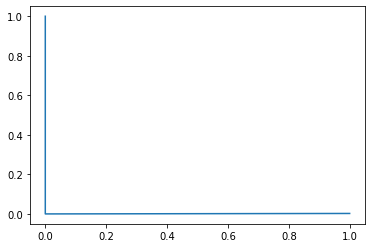

Aire sous la courbe :  0.00115


In [30]:
value, f1_score, precision, recall = evaluation(score, data_quanti["TOP_FRAUDE"], display=True)

# L'aire sous la courbe
print("Aire sous la courbe : ", value)

In [36]:
from sklearn.ensemble import IsolationForest
X = data_quanti.drop(columns=["TOP_FRAUDE","TOP_FRAUDE_CARTE","TOP_FRAUDE_VIREMENT"])
clf = IsolationForest(random_state=0).fit(X)
predic_forest=clf.predict(X)
predic_forest
score =clf.score_samples(X)

C:\Users\fabri\Anaconda3\anconda\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\fabri\Anaconda3\anconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\fabri\Anaconda3\anconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [37]:
np.unique(predic_forest, return_counts=True)

(array([-1,  1]), array([1000, 9000], dtype=int64))

C:\Users\fabri\Anaconda3\anconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


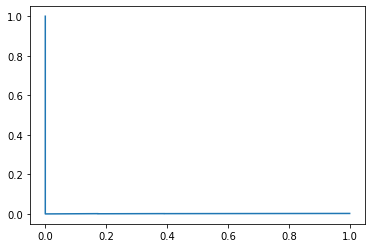

Aire sous la courbe :  0.0015876891245201522


In [38]:
value, f1_score, precision, recall = evaluation(score, data_quanti["TOP_FRAUDE"], display=True)

# L'aire sous la courbe
print("Aire sous la courbe : ", value)

In [34]:
from sklearn.covariance import EllipticEnvelope
X = data_quanti.drop(columns=["TOP_FRAUDE","TOP_FRAUDE_CARTE","TOP_FRAUDE_VIREMENT"])
cov = EllipticEnvelope(random_state=0).fit(X)
# predict returns 1 for an inlier and -1 for an outlier
predic_ellip=cov.predict(X)
predic_ellip

C:\Users\fabri\Anaconda3\anconda\lib\site-packages\sklearn\covariance\robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


array([1, 1, 1, ..., 1, 1, 1])

In [16]:
np.unique(predic_ellip, return_counts=True)

(array([-1,  1]), array([ 20, 180], dtype=int64))

In [21]:
from sklearn import linear_model
X = data_quanti.drop(columns=["TOP_FRAUDE","TOP_FRAUDE_CARTE","TOP_FRAUDE_VIREMENT"])
clf = linear_model.SGDOneClassSVM(random_state=42)
clf.fit(X)
predic_linear = clf.predict(X)

AttributeError: module 'sklearn.linear_model' has no attribute 'SGDOneClassSVM'

In [20]:
np.unique(predic_linear, return_counts=True)

NameError: name 'predic_linear' is not defined

In [32]:
#génération alléatoire d'un vecteur de prédiction
pred_fraud = [random.random() for i in range (20)]
fraud=np.array(pred_fraud)>0.7

array([False,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False])